In [33]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [116]:
cd T:\freely_moving_ephys\ephys_recordings\092820\J524RT\hf1

T:\freely_moving_ephys\ephys_recordings\092820\J524RT\hf1


In [117]:
ls

 Volume in drive T is 8tb internal A
 Volume Serial Number is 7481-8BF5

 Directory of T:\freely_moving_ephys\ephys_recordings\092820\J524RT\hf1

09/29/2020  02:38 PM    <DIR>          .
09/29/2020  02:38 PM    <DIR>          ..
09/29/2020  02:38 PM    <DIR>          .phy
09/29/2020  02:25 PM       638,451,712 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16.bin
09/29/2020  02:31 PM        23,209,644 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16_ksSettings.mat
09/29/2020  02:25 PM        41,489,648 092820_J524RT_whitenoise_hf_Ephys_medianTrace.mat
09/29/2020  02:30 PM           694,744 amplitudes.npy
09/29/2020  02:27 PM           647,782 CAR_fig1.fig
09/29/2020  02:28 PM            32,262 CAR_fig2.fig
09/29/2020  02:30 PM               144 channel_map.npy
09/29/2020  02:30 PM               336 channel_positions.npy
09/29/2020  02:38 PM               605 cluster_Amplitude.tsv
09/29/2020  02:38 PM               522 cluster_ContamPct.tsv
09/29/2020  02:38 PM               569 clus

In [134]:
framerate = 30000
allSpikeT = np.load('spike_times.npy')
allSpikeT = allSpikeT/framerate  # should be a lookup table with timestamps
duration = np.max(allSpikeT)
duration

665.0385333333334

In [119]:
ephys_data = pd.read_csv('cluster_group.tsv',sep = '\t',index_col=0)
ephys_data = ephys_data.astype(object)
ephys_data


,group
cluster_id,
0,good
1,noise
2,good
3,noise
4,noise
5,noise
6,noise
7,good
8,noise


In [120]:
clust = np.load('spike_clusters.npy')
clust

array([41, 16, 61, ..., 41, 12, 31])

In [127]:
ephys_data['spikeT'] = nan
ephys_data['spikeT'] = ephys_data['spikeT'].astype(object)
ephys_data.dtypes

group     object
spikeT    object
dtype: object

In [135]:
for c in np.unique(clust):
    c
    ephys_data.at[c,'spikeT'] =allSpikeT[clust==c].flatten()



In [129]:
ephys_data

,group,spikeT
cluster_id,,
0,good,"[0.06143333333333333, 0.0725, 0.0982, 0.319466..."
1,noise,"[22.787866666666666, 25.502433333333332, 34.09..."
2,good,"[0.10346666666666667, 0.24806666666666666, 0.4..."
3,noise,"[7.1911, 34.12173333333333, 34.32756666666667,..."
4,noise,"[0.4269, 0.4492, 1.2963333333333333, 1.3502333..."
5,noise,"[18.1561, 24.983166666666666, 33.9658666666666..."
6,noise,"[14.976133333333333, 18.420833333333334, 36.71..."
7,good,"[0.073, 0.17476666666666665, 0.207333333333333..."
8,noise,"[1.3794666666666666, 34.08253333333333, 34.208..."


In [85]:
ephys_data.at[1,'spikeT']

(5117, 1)

In [144]:
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells


,group,spikeT
cluster_id,,
0,good,"[0.06143333333333333, 0.0725, 0.0982, 0.319466..."
2,good,"[0.10346666666666667, 0.24806666666666666, 0.4..."
7,good,"[0.073, 0.17476666666666665, 0.207333333333333..."
23,good,"[0.05623333333333334, 0.0608, 0.0822, 0.1031, ..."
28,good,"[0.012433333333333333, 0.12983333333333333, 0...."
31,good,"[0.0591, 0.1457, 0.20906666666666668, 0.3015, ..."
32,good,"[0.019266666666666668, 0.7055333333333333, 0.8..."
59,good,"[1.3816, 1.4074, 1.7556666666666667, 34.9598, ..."
61,good,"[0.009666666666666667, 9.154433333333333, 35.0..."


In [142]:

meanRate=[]

for i, ind in enumerate(goodcells.index):
    meanRate.append = goodcells.at[ind,'spikeT'].size/duration

AttributeError: 'list' object attribute 'append' is read-only

In [139]:
meanRate

9

In [99]:
goodcells.at[ind,'spikeT']

array([[    7507],
       [   11852],
       [   12001],
       ...,
       [35751650],
       [35758145],
       [35759739]], dtype=uint64)

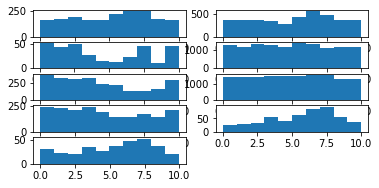

In [145]:
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT']%10,bins = 10)